In [11]:
import pandas as pd
import pycountry

# 读取CSV文件
df = pd.read_csv(r'.\data\MedalStatus\summerOly_athletes.csv')

# 找出所有曾获得奖牌的国家
medal_countries = set(df[df['Medal'] != 'No medal']['NOC'].unique())

# 找出所有参赛的国家
all_countries = set(df['NOC'].unique())

# 筛选出从未获得过奖牌的国家
no_medal_countries = all_countries - medal_countries

# 将从未获得过奖牌的国家转换为DataFrame
no_medal_df = pd.DataFrame(no_medal_countries, columns=['Country'])
medal_df = pd.DataFrame(medal_countries, columns=['Country'])

# 添加国家全称列
def alpha3_to_country_name(alpha3_code):
    try:
        # 查找国家信息
        country = pycountry.countries.get(alpha_3=alpha3_code)
        if country:
            return country.name
        else:
            return "Unknown"
    except Exception as e:
        print(f"Error: {e}")
        return "Unknown"

# 应用转换函数
no_medal_df['NOC'] = no_medal_df['Country'].apply(alpha3_to_country_name)

# 导出结果到新的CSV文件
no_medal_df.to_csv(r'.\data\MedalStatus\CountriesWithoutMedal.csv', index=False)

print("结果已成功导出")

结果已成功导出


In [12]:
# 匹配未获得奖牌的国家缩写以及全称

import pandas as pd

# 读取Excel文件
no_medal_df = pd.read_csv(r'.\data\MedalStatus\CountriesWithoutMedal.csv')

# 读取CSV文件
noc_to_country_df = pd.read_csv('noc to country.csv')

# 假设'1'列表示NOC代码在noc to country.csv中，且我们需要与Excel文件中的某些列进行匹配
# 需要确定Excel文件中用来匹配的列名，这里假设为'country_code'
# 创建hasMedal列，默认值为NaN
noc_to_country_df['hasMedal'] = float('nan')

# 使用apply函数或直接用isin方法进行匹配
# 如果'1'列的值在no_medal_df的'country_code'列中出现，则在hasMedal列中标记为0
noc_to_country_df.loc[noc_to_country_df['1'].isin(no_medal_df['Country']), 'hasMedal'] = 0

# 保存修改后的DataFrame到新的CSV文件
noc_to_country_df.to_csv(r'.\data\MedalStatus\CountriesWithoutMedal_updated.csv', index=False)

In [15]:
import pandas as pd

# 读取更新后的CSV文件
df = pd.read_csv(r'.\data\MedalStatus\CountriesWithoutMedal_updated.csv')

# 获取所有独特的国家代码
countries = df['1'].unique()

# 初始化一个空列表来保存需要移除的国家代码
countries_to_remove = []

# 遍历每个国家
for country in countries:
    # 获取该国家的所有记录
    country_df = df[df['1'] == country]
    
    # 检查是否缺少2016, 2020, 2024这三年
    missing_years = [year for year in [2016, 2020, 2024] if year not in country_df['Year'].values]
    
    # 如果三年都缺失，则将该国家代码加入到需要移除的列表中
    if len(missing_years) == 3:
        countries_to_remove.append(country)

# 提取出需要移除的国家的所有记录
rows_to_extract = df[df['1'].isin(countries_to_remove)]

# 将这些行保存到新表中
rows_to_extract.to_csv(r'.\data\MedalStatus\extracted_rows.csv', index=False)

# 从原DataFrame中移除这些国家的所有记录
df = df[~df['1'].isin(countries_to_remove)]

# 更新后的原文件保存
df.to_csv(r'.\data\MedalStatus\CountriesWithoutMedal_final.csv', index=False)

print("已将符合条件的国家（即缺少2016, 2020, 2024三年记录的国家）的所有记录提取到extracted_rows.csv，并从原文件中移除了这些记录")

已将符合条件的国家（即缺少2016, 2020, 2024三年记录的国家）的所有记录提取到extracted_rows.csv，并从原文件中移除了这些记录


In [31]:
import pandas as pd

# 读取final_medal_counts.csv文件
final_medal_counts_path = r'.\data\final_medal_counts.csv'
final_medal_counts_df = pd.read_csv(final_medal_counts_path)

# 确保NOC列的数据类型为字符串
final_medal_counts_df['NOC'] = final_medal_counts_df['NOC'].astype(str)

# 按NOC列进行分组，并对Total列进行累加，计算各国家总共获取奖牌数
grouped_totals = final_medal_counts_df.groupby('NOC')['Total'].sum().reset_index()
grouped_totals.rename(columns={'Total': 'MedalCounts'}, inplace=True)

# 将计算好的MedalCounts合并回原始DataFrame
final_medal_counts_df = final_medal_counts_df.merge(grouped_totals, on='NOC', how='left')

# 打印前几行以验证结果
print(final_medal_counts_df.head())

# （可选）如果需要，可以保存更新后的DataFrame回到原来的CSV文件
# output_path = r'.\data\final_medal_counts.csv'
# final_medal_counts_df.to_csv(output_path, index=False)

print("已将final_medal_counts.csv中所有NOC相同的行的Total进行累加，并将结果作为新列MedalCounts添加到原DataFrame中")

   Year            Host          NOC  isHost  Gold  Total  gold_ratio  \
0  2012  United Kingdom  Afghanistan       0     0      1    0.000000   
1  2008           China  Afghanistan       0     0      1    0.000000   
2  2024          France      Albania       0     0      2    0.000000   
3  2024          France      Algeria       0     2      3    0.006098   
4  2016          Brazil      Algeria       0     0      2    0.000000   

   total_ratio  Avg_X_Gold  Avg_X_Total  Count  CountryNum  MedalCounts  
0     0.001042        0.00          1.0      6           0            2  
1     0.001044        0.00          1.0      4           0            2  
2     0.001925        0.00          2.0      9           1            2  
3     0.002887        0.75          2.0     55           2           20  
4     0.002058        0.50          2.5     74           2           20  
已将final_medal_counts.csv中所有NOC相同的行的Total进行累加，并将结果作为新列MedalCounts添加到原DataFrame中


In [34]:
# 获取各国家总共参赛次数

import pandas as pd

# 读取CSV文件
df = pd.read_csv(r'.\data\MedalStatus\AthletesStatus_final.csv')

# 假设'1'是你想要分析的实际列名
column_name = 'NOC'

# 计算'1'列中每个元素出现的次数
frequency_series = df[column_name].value_counts()

# 将series转换为DataFrame，并重命名列
frequency_df = frequency_series.reset_index()
frequency_df.columns = [column_name, 'Frequency']  # 第一列是原值，第二列是频率

# （可选）如果需要，保存新的DataFrame到CSV文件
# frequency_df.to_csv('.\\data\\MedalStatus\\Frequency_output.csv', index=False)

# 合并两个DataFrame
merged_df = pd.merge(final_medal_counts_df, frequency_df, on='NOC', how='outer')
cleaned_df = merged_df.dropna(subset=['NOC', 'MedalCounts', 'Frequency'])

print(cleaned_df.head())

# （可选）如果需要，保存新的DataFrame到CSV文件
output_path = r'.\data\final_medal_counts_aggregated.csv'
cleaned_df.to_csv(output_path, index=False)

     Year            Host          NOC  isHost  Gold  Total  gold_ratio  \
0  2012.0  United Kingdom  Afghanistan     0.0   0.0    1.0    0.000000   
1  2008.0           China  Afghanistan     0.0   0.0    1.0    0.000000   
2  2024.0          France      Albania     0.0   0.0    2.0    0.000000   
3  2024.0          France      Algeria     0.0   2.0    3.0    0.006098   
4  2016.0          Brazil      Algeria     0.0   0.0    2.0    0.000000   

   total_ratio  Avg_X_Gold  Avg_X_Total  Count  CountryNum  MedalCounts  \
0     0.001042        0.00          1.0    6.0         0.0          2.0   
1     0.001044        0.00          1.0    4.0         0.0          2.0   
2     0.001925        0.00          2.0    9.0         1.0          2.0   
3     0.002887        0.75          2.0   55.0         2.0         20.0   
4     0.002058        0.50          2.5   74.0         2.0         20.0   

   Frequency  
0       16.0  
1       16.0  
2       10.0  
3       15.0  
4       15.0  


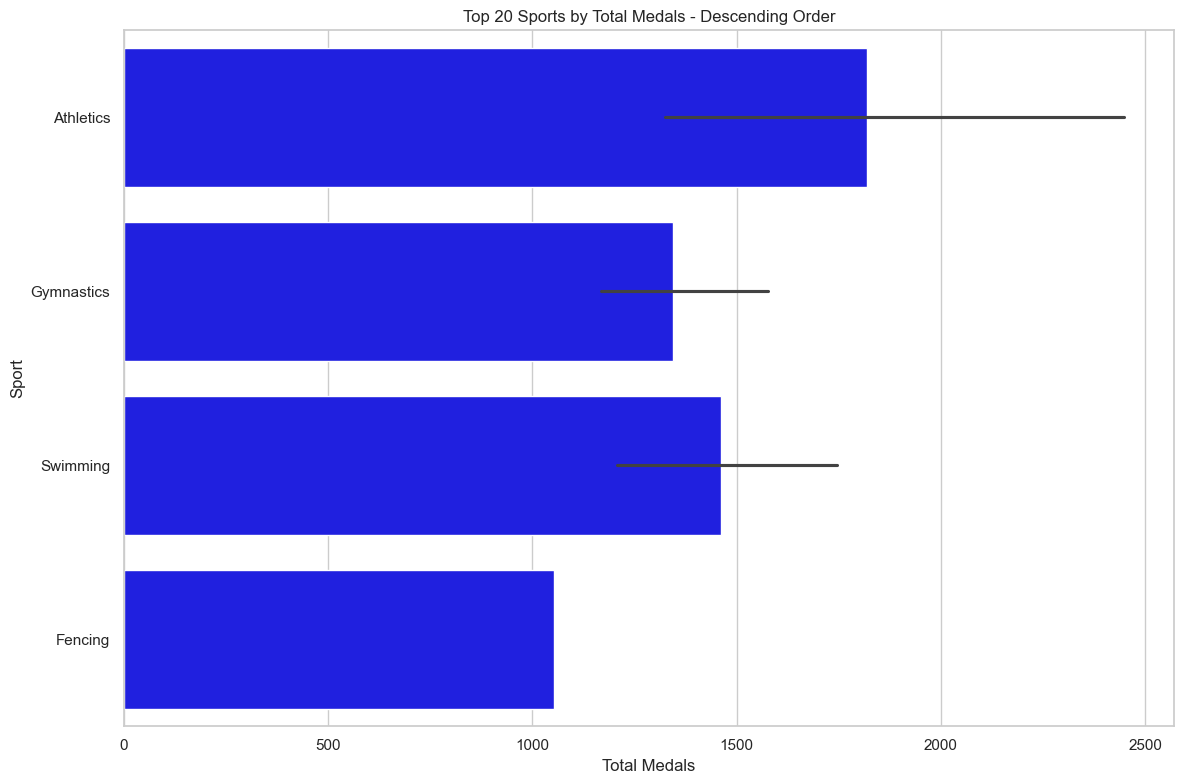

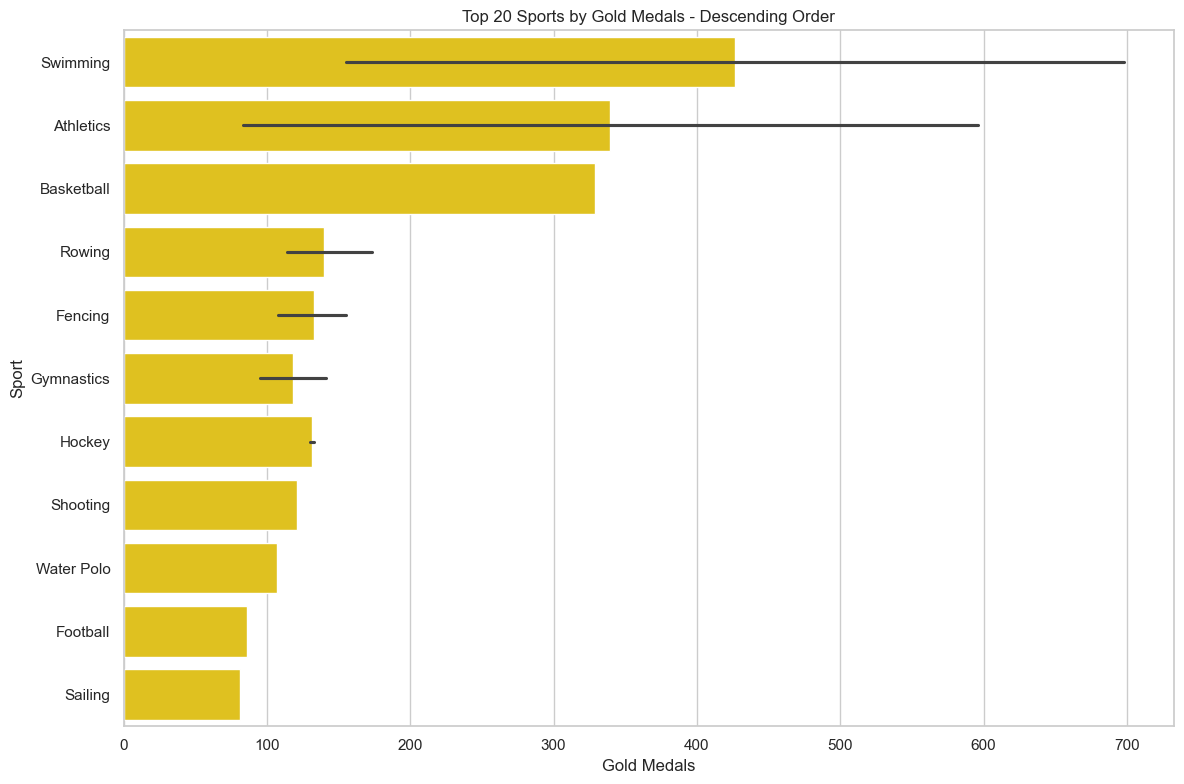

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取CSV文件并进行之前的操作
df = pd.read_csv(r'.\data\MedalStatus\summerOly_athletes.csv')
df['is_gold'] = df['Medal'] == 'Gold'

# 聚合数据：计算金牌数量、总奖牌数以及每个国家在每种运动中的运动员人数
aggregated_df = df.groupby(['NOC', 'Sport']).agg(
    gold_count=('is_gold', 'sum'), # 计算金牌数量
    total_medals=('Medal', 'count'), # 总奖牌数计数
    athlete_count=('Name', 'nunique') # 每个国家在每种运动中的运动员人数
).reset_index()

# 根据总奖牌数和金牌数分别对每个运动项目进行降序排序
sorted_total_medals = aggregated_df.sort_values(by='total_medals', ascending=False)
sorted_gold_medals = aggregated_df.sort_values(by='gold_count', ascending=False)

# 设置绘图风格
sns.set(style="whitegrid")

# 绘制总奖牌数的直方图
plt.figure(figsize=(12, 8))
sns.barplot(data=sorted_total_medals.head(20), x='total_medals', y='Sport', color='blue', orient='h') # 只显示前20个运动项目
plt.title('Top 20 Sports by Total Medals - Descending Order')
plt.xlabel('Total Medals')
plt.ylabel('Sport')
plt.tight_layout()
plt.show()

# 绘制金牌数的直方图
plt.figure(figsize=(12, 8))
sns.barplot(data=sorted_gold_medals.head(20), x='gold_count', y='Sport', color='gold', orient='h') # 只显示前20个运动项目
plt.title('Top 20 Sports by Gold Medals - Descending Order')
plt.xlabel('Gold Medals')
plt.ylabel('Sport')
plt.tight_layout()
plt.show()

# 导出聚合完的表格为 CSV 文件
aggregated_df.to_csv('Medal_Sports_NOC.csv', index=False)

In [16]:
import pandas as pd

# 读取两个CSV文件
final_medal_counts = pd.read_csv(r'.\data\final_medal_counts_aggregated.csv')
q1_2_data = pd.read_csv('Q1_2_data_cleaned.csv')

# 清理列名（去除空格和不可见字符）
final_medal_counts.columns = final_medal_counts.columns.str.strip()
q1_2_data.columns = q1_2_data.columns.str.strip()

# 检查 NOC 和 Year 列中是否有缺失值
print("final_medal_counts 缺失值统计:")
print(final_medal_counts[['NOC', 'Year']].isnull().sum())

print("q1_2_data 缺失值统计:")
print(q1_2_data[['NOC', 'Year']].isnull().sum())

# 删除包含缺失值的行
final_medal_counts = final_medal_counts.dropna(subset=['NOC', 'Year'])
q1_2_data = q1_2_data.dropna(subset=['NOC', 'Year'])

# 检查 Year 列中是否有非数字字符
print("q1_2_data Year 列异常值:")
print(q1_2_data[q1_2_data['Year'].astype(str).str.isdigit() == False])

# 只保留 Year 列中为数字的行
q1_2_data = q1_2_data[q1_2_data['Year'].astype(str).str.isdigit()]

# 转换数据类型
final_medal_counts['NOC'] = final_medal_counts['NOC'].astype(str)
final_medal_counts['Year'] = final_medal_counts['Year'].astype(int)

q1_2_data['NOC'] = q1_2_data['NOC'].astype(str)
q1_2_data['Year'] = q1_2_data['Year'].astype(int)

# 检查 q1_2_data 中 NOC 和 Year 列的组合是否唯一
print("q1_2_data 中 NOC 和 Year 列重复值数量:")
print(q1_2_data[['NOC', 'Year']].duplicated().sum())

# 选择需要聚合的列（从第 8 列开始）
columns_to_aggregate = q1_2_data.columns[7:]

# 将 NOC 和 Year 列与需要聚合的列合并
q1_2_data_aggregated = q1_2_data[['NOC', 'Year'] + list(columns_to_aggregate)]

# 按照 NOC 和 Year 进行聚合
q1_2_data_aggregated = q1_2_data_aggregated.groupby(['NOC', 'Year']).sum().reset_index()

# 将两个 DataFrame 按照 NOC 和 Year 进行合并
merged_data = pd.merge(final_medal_counts, q1_2_data_aggregated, on=['NOC', 'Year'], how='left')

# 保存合并后的数据到新的 CSV 文件（可选）
merged_data.to_csv(r'.\data\merged_final_data.csv', index=False)

# 打印合并后的数据前几行以确认结果
print(merged_data.head())

final_medal_counts 缺失值统计:
NOC     1
Year    0
dtype: int64
q1_2_data 缺失值统计:
NOC     0
Year    0
dtype: int64
q1_2_data Year 列异常值:
Empty DataFrame
Columns: [NOC, Year, Gold, Silver, Bronze, Total, Artistic Swimming, Diving, Marathon Swimming, Swimming, Water Polo, Archery, Athletics, Badminton, Baseball, Softball, 3x3, Basketball, Basque Pelota, Boxing, Breaking, Sprint, Slalom, Cricket, Croquet, BMX Freestyle, BMX Racing, Mountain Bike, Road, Track, Dressage, Eventing, Jumping, Vaulting, Driving, Fencing, Field hockey, Flag football, Football, Golf, Artistic, Rhythmic, Trampoline, Indoor, Field, Jeu de Paume, Judo, Karate, Sixes, Field.1, Modern Pentathlon, Polo, Rackets, Roque, Coastal, Rowing, Sevens, Union, Sailing, Shooting, Skateboarding, Sport Climbing, Squash, Surfing, Table Tennis, Taekwondo, Tennis, Triathlon, Tug of War, Beach, Indoor.1, Water Motorsports, Weightlifting, Freestyle, Greco-Roman, Total events, Total disciplines, Total sports, Total_Sports_Events, Host_Country, 

In [50]:
# 读取运动员数据
summerOly_athletes = pd.read_csv('summerOly_athletes.csv')

# 获取所有独特的运动项目
sports = summerOly_athletes['Sport'].unique()

# 统计每年、每个国家在各个运动的获奖数量
awards_summary = (
    summerOly_athletes
    .groupby(['Year', 'NOC', 'Sport'])
    .size()
    .unstack(fill_value=0)  # 将运动项目展开为列
    .reindex(columns=sports, fill_value=0)  # 确保所有运动项目都在列中
    .reset_index()
)

# 为运动项目列添加前缀
awards_summary.columns = list(awards_summary.columns[:2]) + ["NM_" + col for col in awards_summary.columns[2:]]
awards_summary.to_csv('处理后的运动项目数据.csv', index=False)

KeyError: 'Sport'

In [51]:
import pandas as pd

# 读取CSV文件
summerOly_athletes = pd.read_csv('predictions_2028_with_intervals.csv')

# 读取Excel文件
df_unwin = pd.read_excel('未获奖国家.xlsx')

# 假设未获奖国家.xlsx中的国家信息在'Country'列中
unwin_countries = df_unwin['NOC'].tolist()

# 过滤Q1_2数据汇总（未获奖）中的NOC列，保留在未获奖国家列表中的国家
filtered_df = summerOly_athletes[summerOly_athletes['Country'].isin(unwin_countries)]

# 保存结果到新的CSV文件（可选）
filtered_df.to_csv('Filtered_summerOly_athletes.csv', index=False)

In [1]:
import pandas as pd

# 读取CSV文件
df_q1_2 = pd.read_csv('final_predictions_2028_with_intervals_and_probs_Optimal.csv')

"""# 读取Excel文件
df_unwin = pd.read_excel('未获奖国家.xlsx')

# 假设未获奖国家.xlsx中的国家信息在'NOC'列中
unwin_countries = df_unwin['NOC'].tolist()"""

# 将所有负数转换为0
df_q1_2 = df_q1_2.applymap(lambda x: 0 if isinstance(x, (int, float)) and x < 0 else x)

"""# 创建一个新的列 'hasMedal'，并根据国家是否在未获奖国家列表中进行赋值
df_q1_2['hasMedal'] = df_q1_2['Country'].apply(lambda x: 1 if x in unwin_countries else 0)"""

# 保存结果到新的CSV文件（可选）
df_q1_2.to_csv('final_predictions_2028_with_intervals_and_probs_Optimal.csv', index=False)

print("更新完成，结果已保存到 'updated_predictions_2028_with_intervals.csv'")

更新完成，结果已保存到 'updated_predictions_2028_with_intervals.csv'


C:\Users\ROG\AppData\Local\Temp\ipykernel_31260\800576931.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_q1_2 = df_q1_2.applymap(lambda x: 0 if isinstance(x, (int, float)) and x < 0 else x)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_csv('cleaned_summerOly_programs.csv')

# 获取Sport列和年份列
sport_column = 'Sport'
year_columns = df.columns[2:]  # 从第3列开始是年份列

# 将数据中的所有非数字值替换为NaN，然后填充NaN为0
df[year_columns] = df[year_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

# 创建一个空字典来存储每个Sport的项目数量变化趋势
sport_trends = {}

# 遍历每一行数据，根据Sport进行分组
for _, row in df.iterrows():
    sport = row[sport_column]
    counts = row[year_columns].values  # 获取对应年份的项目数量
    if sport not in sport_trends:
        sport_trends[sport] = []
    sport_trends[sport].append(counts)

# 绘制折线图
plt.figure(figsize=(100, 60))

for sport, trends in sport_trends.items():
    # 合并每个sport的项目数量变化趋势
    avg_trends = pd.DataFrame(trends).mean(axis=0)
    plt.plot(year_columns, avg_trends, label=sport)

plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.title('Sport Event Count Trends by Year')
plt.legend(title='Sport', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
